In [44]:
import numpy as np 
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
#from sklearn.preprocessing import LabelEncoder

reader = csv.reader(open("titanic-passengers.csv", "r"), delimiter=';')
writer = csv.writer(open("output.csv", 'w'), delimiter=',')
writer.writerows(reader)
data=pd.read_csv('output.csv')
data["Age"].fillna(0,inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [46]:
data["Sex"]=data["Sex"].map({"female": 1, "male": 0})   
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",0,37.0,2,0,3101276,7.9250,NaN,S
6,576,0,3,"Patchett, Mr. George",0,19.0,0,0,358585,14.5000,NaN,S
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",1,1.0,0,2,2653,15.7417,NaN,C
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",0,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [53]:
from sklearn.model_selection import train_test_split
x = data[["Sex", "Age"]]
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.30, 
                                                    random_state=1)

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
print("Accuracy={:.2f}".format(logmodel.score(X_test, y_test)))

Accuracy=0.78


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

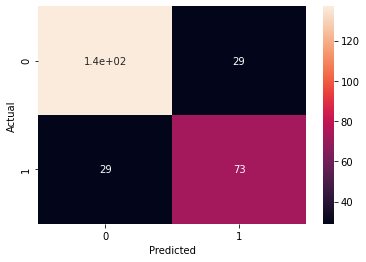

In [58]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

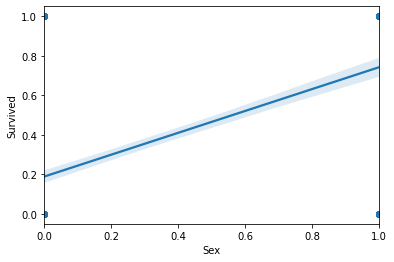

In [60]:
sns.regplot(x='Sex',y='Survived',data=data)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       166
           1       0.72      0.72      0.72       102

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_prob=[0 for _ in range(len(y_test))]
y_auc = roc_auc_score(y_test, y_prob)

In [90]:
x_prob = logmodel.predict_proba(X_test)
x_prob=x_prob[:,1]
x_auc=roc_auc_score(y_test, x_prob)

In [93]:
print('Survived: ROC AUC=%.3f' % (y_auc))
print('Input: ROC AUC=%.3f' % (x_auc))

Survived: ROC AUC=0.500
Input: ROC AUC=0.780


In [92]:
y_fpr, y_tpr, _ = roc_curve(y_test, y_prob)
x_fpr, x_tpr, _ = roc_curve(y_test, x_prob)

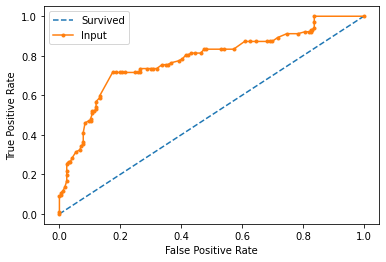

In [95]:
plt.plot(y_fpr, y_tpr, linestyle='--', label='Survived')
plt.plot(x_fpr, x_tpr, marker='.', label='Input')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()